In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
url = "Desktop/student_scores.csv"
df = pd.read_csv(url)
print("Data imported successfully!")

Data imported successfully!


In [3]:
df.head()                            # First 5 values in dataset

Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30

In [5]:
df.tail()                            # last 5 values in dataset

Hours  Scores
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86

In [6]:
df.shape 

(25, 2)

In [7]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [8]:
df.describe()

Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000

In [9]:
df.corr() 

Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000

Text(0, 0.5, 'Percentage Score')

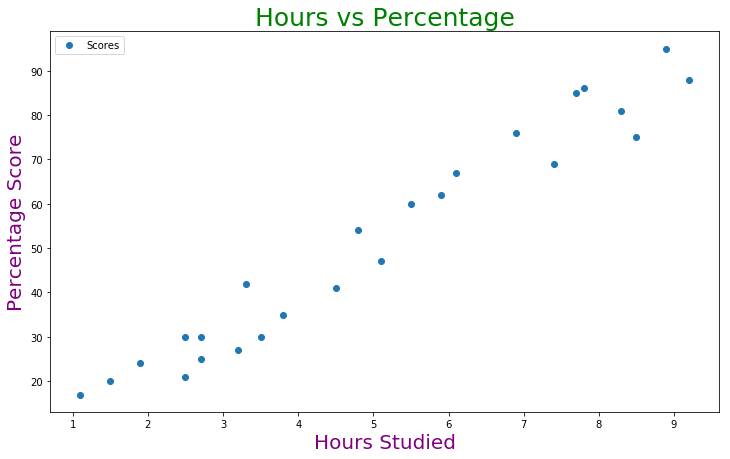

In [10]:

df.plot(x='Hours', y='Scores', style='o', figsize=(12, 7))      # visualising the data
plt.title('Hours vs Percentage',color="green", size=25)      
plt.xlabel('Hours Studied', color="purple",size=20)                    
plt.ylabel('Percentage Score', color="purple",size=20)

In [11]:
x = df.iloc[:, :-1].values    
y = df.iloc[:, 1].values           # assigning value to x and y


In [12]:
from sklearn.linear_model import LinearRegression
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 
print("The training of model is complete!")

The training of model is complete!


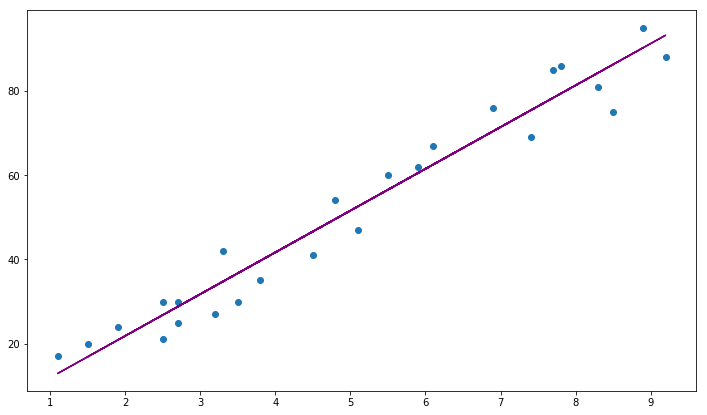

In [13]:
line = regressor.coef_*x+regressor.intercept_

plt.figure(figsize=(12, 7))
plt.scatter(x, y)
plt.plot(x, line, color="purple")
plt.show()

In [14]:
print(x_test)              #Testing the data 
y_pred = regressor.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [16]:
a = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
a                                                           #comparison Actual vs Predicted values

Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033

In [17]:
print("Training Score: ",regressor.score(x_train, y_train))
print("Testing Score: ",regressor.score(x_test, y_test))

Training Score:  0.9515510725211553
Testing Score:  0.9454906892105356


In [18]:
s = float(input("Enter the Number of Hours: "))
self_prediction = regressor.predict(np.array([s]).reshape(-1,1))                     #Predicting the value using regressor    
print("Number of Hours = {} \nPredicted Score = {}".format(s,self_prediction[0]))

Enter the Number of Hours: 10
Number of Hours = 10.0 
Predicted Score = 101.12472484785705


In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
print("Mean Squared Error: ",mean_squared_error(y_test, y_pred))
print("Mean Absolute Error: ",mean_absolute_error(y_test, y_pred)) 
print("Root Mean Squared Error: ",np.sqrt(mean_absolute_error(y_test, y_pred)))
print("R-2 Score: ",r2_score(y_test, y_pred))

Mean Squared Error:  21.5987693072174
Mean Absolute Error:  4.183859899002975
Root Mean Squared Error:  2.0454485813637495
R-2 Score:  0.9454906892105356
